In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data= pd.read_excel(r"E:\data 2\Data science\flightFare/Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [9]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [11]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
train_data['Journey_day']= train_data['Date_of_Journey'].dt.day
train_data['Journey_month']= train_data['Date_of_Journey'].dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-12 05:50:00,2022-01-12 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-12 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-12 18:05:00,2022-01-12 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-12 16:50:00,2022-01-12 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [14]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-12 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-12 05:50:00,2022-01-12 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-12 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-12 18:05:00,2022-01-12 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-12 16:50:00,2022-01-12 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
def extract_hour(df,col):
    df[col +'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col + '_min']=df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [16]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-12 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-12 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-12 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [18]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h ' + duration[i]
               
            

In [19]:
train_data['Duration']= duration

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [22]:
train_data['Duration_hour']= train_data['Duration'].apply(hour)
train_data['Duration_minute']= train_data['Duration'].apply(minute)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [24]:
drop_column(train_data,'Duration')

In [25]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour        object
Duration_minute      object
dtype: object

In [26]:
train_data['Duration_hour']= train_data['Duration_hour'].astype(int)
train_data['Duration_minute']= train_data['Duration_minute'].astype(int)

In [27]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hour         int32
Duration_minute       int32
dtype: object

In [28]:
cat_col= [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [29]:
oth_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
oth_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hour',
 'Duration_minute']

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
#nominal data - one hot encoding
#ordinal data - labelEncoder

In [32]:
categorical= train_data[cat_col]
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [33]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

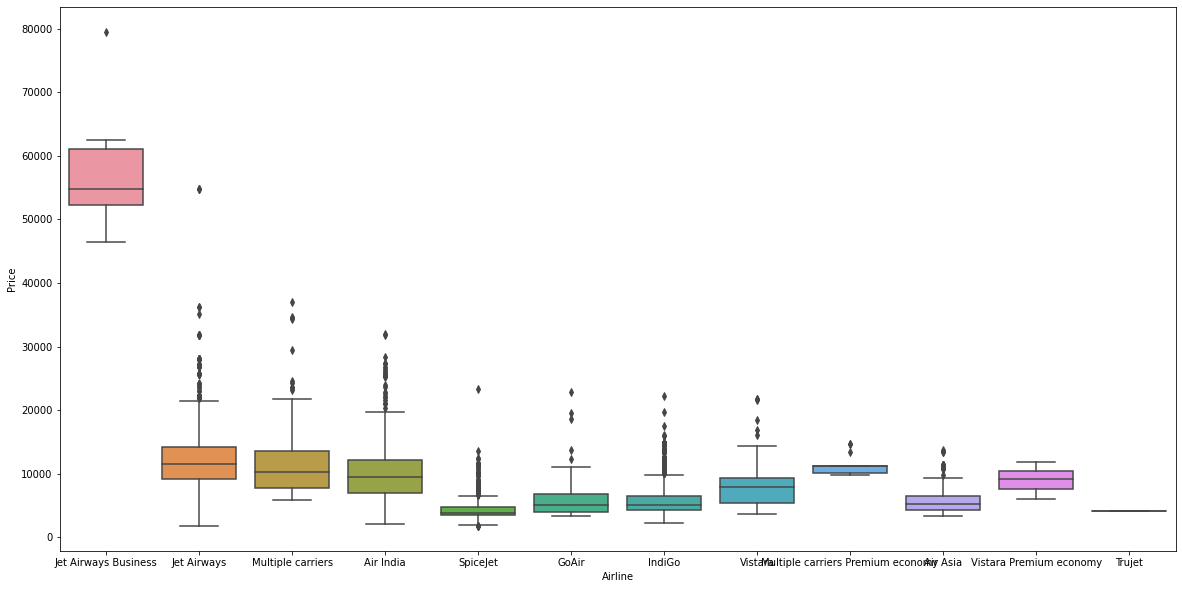

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Airline", y="Price", data=train_data.sort_values('Price', ascending=False))

In [35]:
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

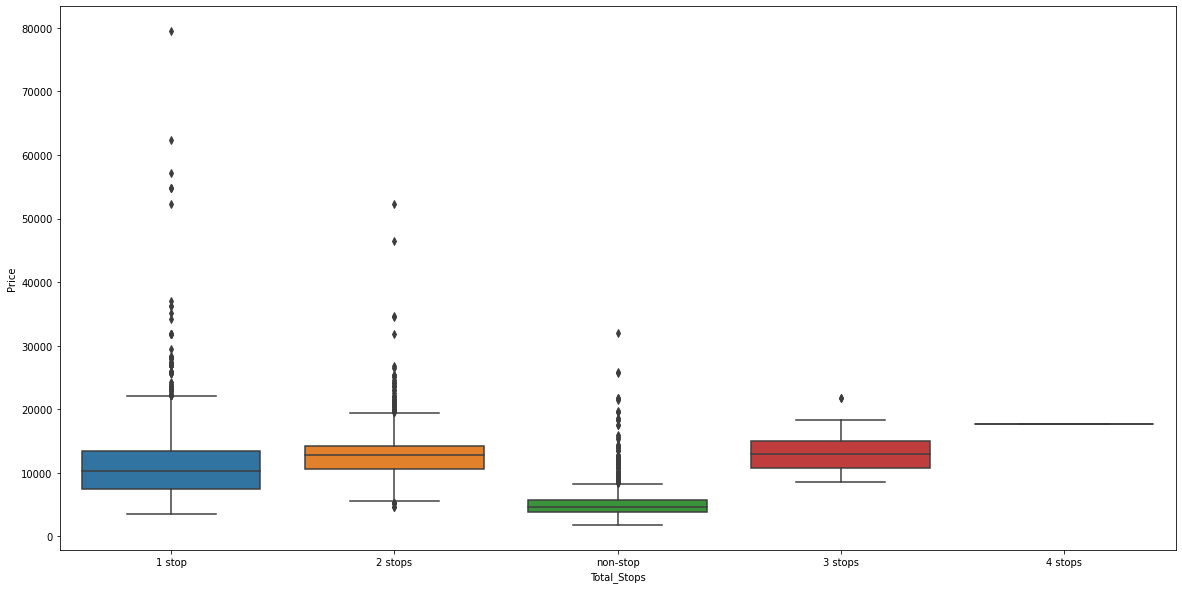

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Total_Stops", y="Price", data=train_data.sort_values("Price",ascending=False))

In [37]:
Airline= pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

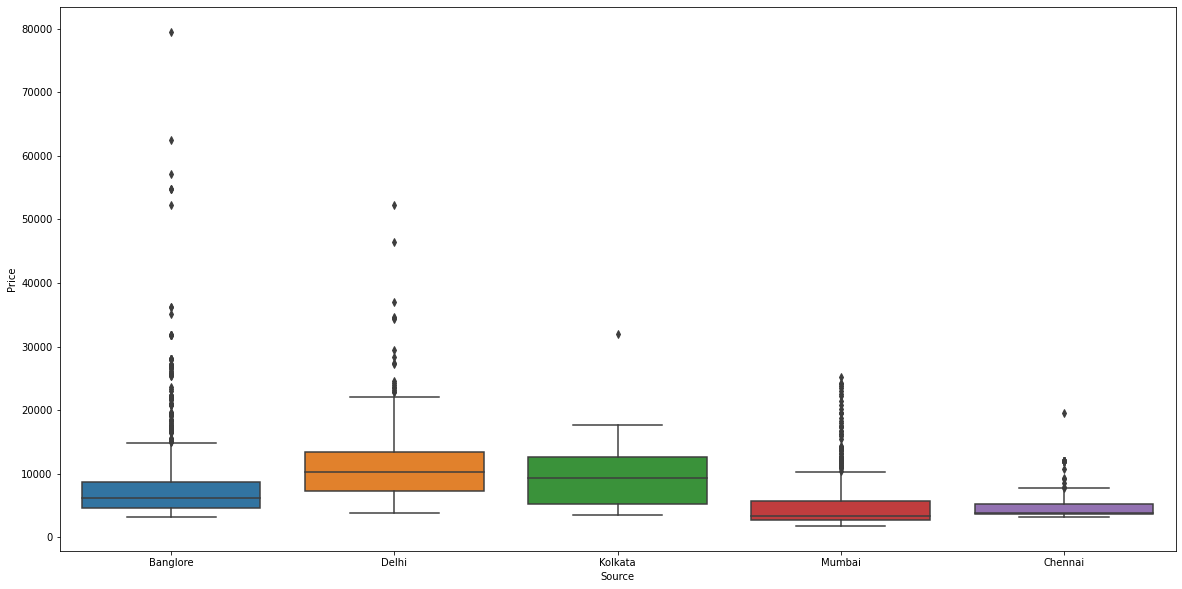

In [39]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [40]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [41]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

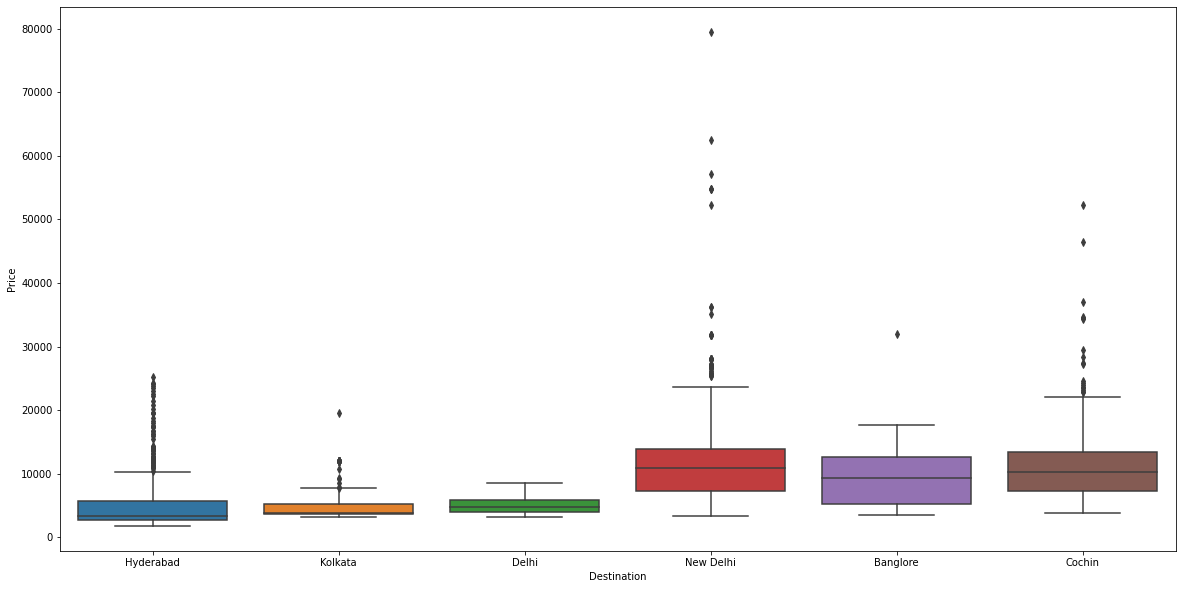

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=True))

In [43]:
Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [44]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [45]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [46]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

C:\Users\win10\AppData\Local\Temp/ipykernel_9088/4124669443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
C:\Users\win10\AppData\Local\Temp/ipykernel_9088/4124669443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
C:\Users\win10\AppData\Local\Temp/ipykernel_9088/4124669443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [48]:
drop_column(categorical,'Route')

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [50]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None', inplace=True)

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [51]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [52]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
encoder=LabelEncoder()

In [55]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [56]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\win10\AppData\Local\Temp/ipykernel_9088/1864785191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [58]:
drop_column(categorical,'Additional_Info')

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [60]:
dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [61]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\win10\AppData\Local\Temp/ipykernel_9088/130354464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [63]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[oth_col]],axis=1)

In [64]:
data_train

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5,0,...,0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5,1,...,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5,0,...,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,12648,3,1,11,30,14,10,2,40


In [65]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [66]:
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [67]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [68]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


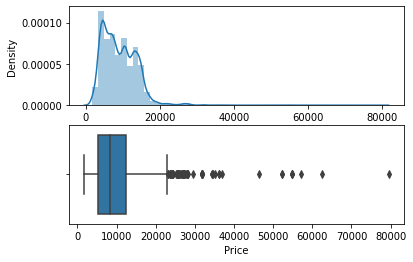

In [69]:
plot(data_train,'Price')

In [70]:
np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


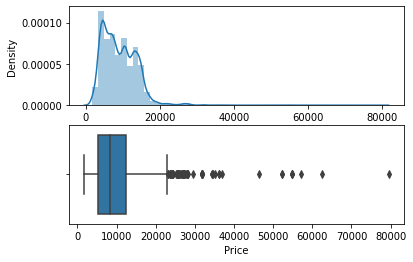

In [71]:
plot(data_train,'Price')

In [72]:
X= data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [73]:
y=data_train['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [74]:
from sklearn.feature_selection import mutual_info_classif

In [75]:
mutual_info_classif(X,y)

array([2.14673041, 2.03244099, 2.76452928, 2.34782399, 1.51207657,
       0.72708478, 0.76043881, 0.11054024, 0.6868399 , 0.91396821,
       0.0063923 , 0.57805153, 0.02345898, 0.32617564, 0.        ,
       0.23790701, 0.        , 0.17233843, 1.5217868 , 0.87459795,
       0.28447584, 1.54853893, 0.41305653, 0.29436293, 0.17267127,
       0.37244116, 1.09079023, 0.86285151, 1.44715141, 1.21511425,
       1.84567824, 1.52474093, 1.78766214, 1.07597396])

In [76]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.171926
Route1,2.055650
Route2,2.791490
Route3,2.271166
Route4,1.464922
Route5,0.720927
Air India,0.757592
GoAir,0.092086
IndiGo,0.693044
Jet Airways,0.938535


In [77]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.791490
Route3,2.271166
Total_Stops,2.171926
Route1,2.055650
Arrival_Time_hour,1.850833
Duration_hour,1.768852
Cochin,1.578979
Delhi,1.554315
Arrival_Time_min,1.515843
Route4,1.464922


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE:',metrics.mean_absolute_error(y_test,predictions))
    print('MSE:',metrics.mean_squared_error(y_test,predictions))
    print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)
    
    if dump==1:
        file=open(r'E:\data 2\Data science\flightFare/model.pkl','wb')
        pickle.dump(model,file)       

In [81]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9508870372768842
Predictions are: [10351.51        9673.4225     10402.74333333 ... 14210.79266667
 14324.29583333  2807.31      ]


r2 score is: 0.8461696510737575
MAE: 1130.9240786798732
MSE: 3250503.5791239007
RMSE: 33.629214660468556


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


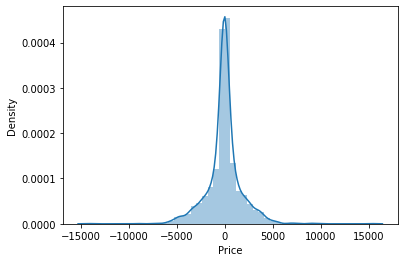

In [82]:
predict(RandomForestRegressor(),1)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6112436929978549
Predictions are: [10550.39641896 11563.91310708 11506.92621661 ... 11921.54769418
 12657.87913382  2396.44450661]


r2 score is: 0.6938617780796632
MAE: 1879.2026007492004
MSE: 6468836.565766403
RMSE: 43.34977048092873


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


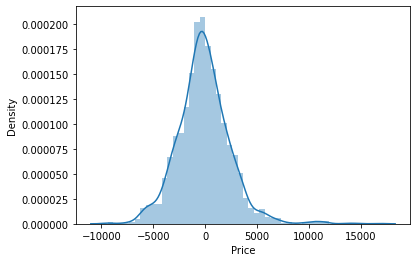

In [84]:
predict(LinearRegression(),0)

Training Score: 0.9701327940798866
Predictions are: [10262.  8529. 10844. ... 15554. 13029.  2754.]


r2 score is: 0.759859574212949
MAE: 1285.170176259554
MSE: 5074273.828029948
RMSE: 35.84927023329141


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


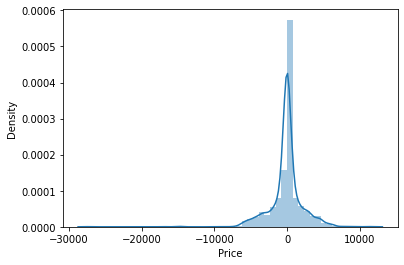

In [85]:
predict(DecisionTreeRegressor(),0)

Training Score: 0.7473957826003788
Predictions are: [11316.4 11567.2 11168.2 ... 12583.8 17565.   2648.6]


r2 score is: 0.6292333992336365
MAE: 1727.8261113710812
MSE: 7834462.908151615
RMSE: 41.56712777389221


C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


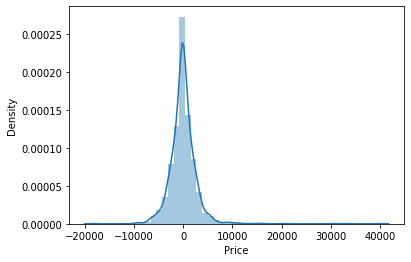

In [86]:
predict(KNeighborsRegressor(),0)

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
reg_rf=RandomForestRegressor()

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [91]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [92]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [93]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [94]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [96]:
prediction=rf_random.predict(X_test)

C:\Users\win10\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

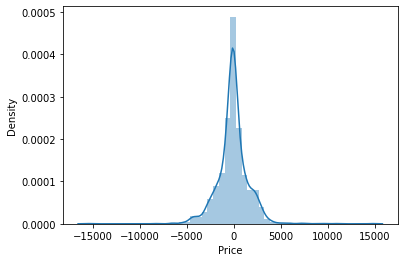

In [97]:
sns.distplot(y_test-prediction)

In [98]:
metrics.r2_score(y_test,prediction)

0.8703346278880986

In [99]:
file=open(r'E:\data 2\Data science\flightFare/rf_random.pkl','wb')

In [100]:
pickle.dump(rf_random,file)

In [101]:
model=open(r'E:\data 2\Data science\flightFare/model.pkl','rb')
forest=pickle.load(model)

In [102]:
predictions2=forest.predict(X_test)

In [104]:
metrics.r2_score(y_test,predictions2)

0.8461696510737575